## 1.0 Data Collection and Exploration

### 1.1 Import all the `library` needed and dataset loading

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset

data = pd.read_csv('dataset.csv')



### 1.2 Explore the dataset

In [2]:
print(data.shape)
print(data.head())
print(data.info())
print(data.isnull().sum())
data


(12372, 22)
   gender  age maritalStatus  children        education            income  \
0  Female   21       Partner         0          College   $87500 - $99999   
1  Female   26       Married         0  Graduate degree   $50000 - $62499   
2  Female   31       Married         0          College   $100000 or More   
3    Male   46        Single         0          College  Less than $12500   
4  Female   21       Married         1          College   $25000 - $37499   

  destination passanger weather  temperature  ...  visitCoffeeHouse  \
0      Others   Friends   Sunny           28  ...        very often   
1      Others   Partner   Sunny           28  ...            rarely   
2        Home     Alone   Sunny           28  ...            rarely   
3      Others   Friends   Sunny            0  ...             often   
4        Work     Alone   Sunny           13  ...        very often   

  visitFastFood visitFoodCourt visitRestaurant     storeType offerEndSoon  \
0         often      

,gender,age,maritalStatus,children,education,income,destination,passanger,weather,temperature,...,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,storeType,offerEndSoon,moreThan5km,moreThan15km,sameDirection,stopBy(y)
0,Female,21,Partner,0,College,$87500 - $99999,Others,Friends,Sunny,28,...,very often,often,often,rarely,Food Court,Yes,0,0,0,1
1,Female,26,Married,0,Graduate degree,$50000 - $62499,Others,Partner,Sunny,28,...,rarely,rarely,very often,rarely,Coffee House,No,0,0,0,0
2,Female,31,Married,0,College,$100000 or More,Home,Alone,Sunny,28,...,rarely,very often,often,sometimes,Coffee House,Yes,0,0,1,1
3,Male,46,Single,0,College,Less than $12500,Others,Friends,Sunny,0,...,often,sometimes,rarely,sometimes,Fast Food,No,1,0,0,1
4,Female,21,Married,1,College,$25000 - $37499,Work,Alone,Sunny,13,...,very often,sometimes,very often,sometimes,Coffee House,Yes,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12367,Female,31,Married,1,College,$12500 - $24999,Others,Friends,Sunny,28,...,NaN,often,often,NaN,Fast Food,Yes,1,0,0,1
12368,Female,36,Married,0,Bachelors degree,$25000 - $37499,Home,Alone,Rainy,13,...,sometimes,often,often,often,Coffee House,Yes,0,0,1,0
12369,Female,21,Partner,0,Associates degree,$75000 - $87499,Work,Alone,Sunny,13,...,rarely,sometimes,sometimes,rarely,Coffee House,Yes,1,1,0,0
12370,Male,31,Married,0,College,$100000 or More,Work,Alone,Sunny,28,...,never,often,sometimes,sometimes,Fast Food,Yes,0,0,1,1


#### Pie Charts

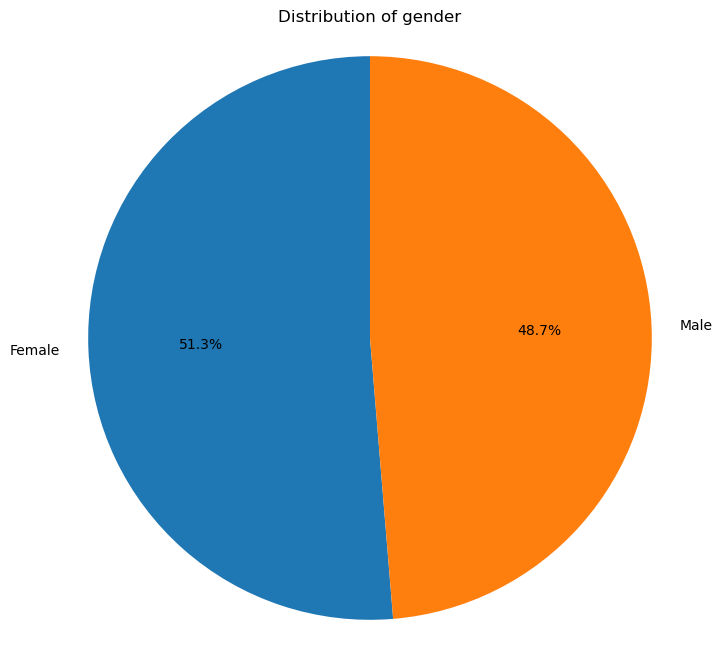

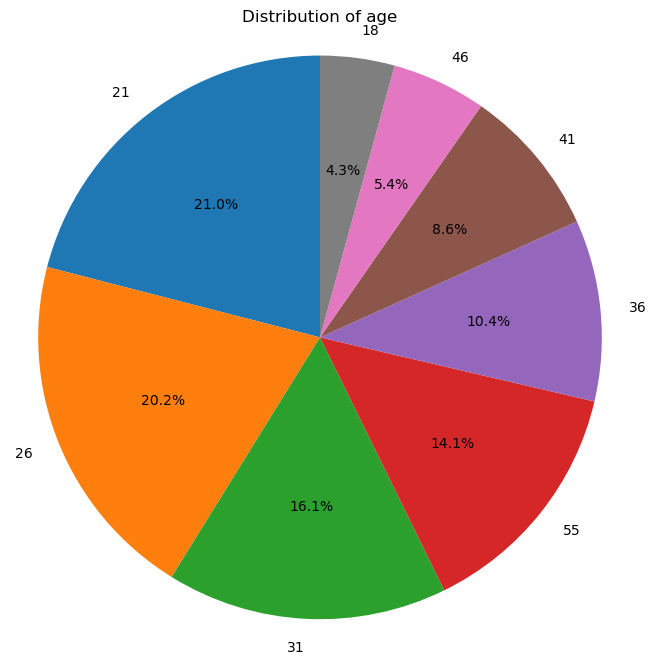

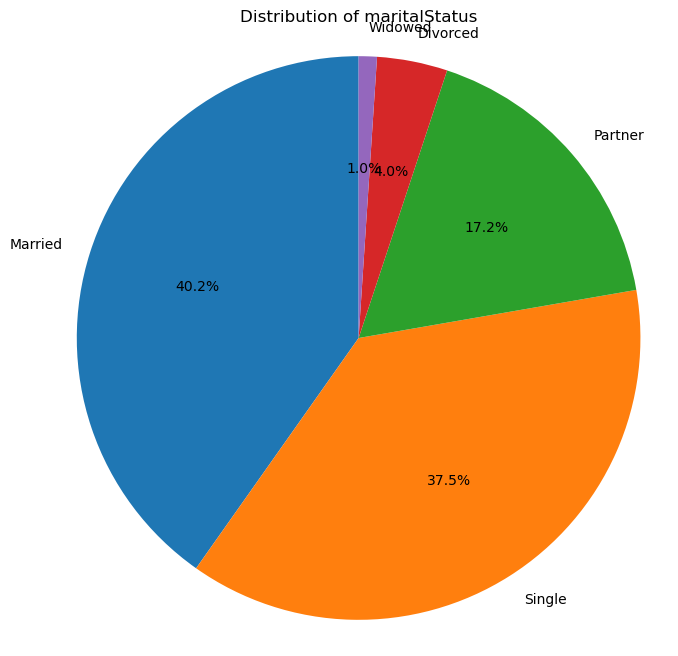

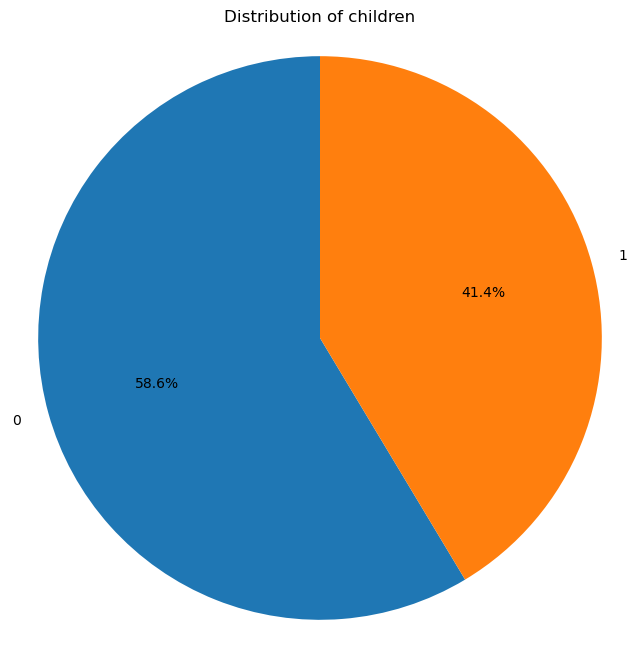

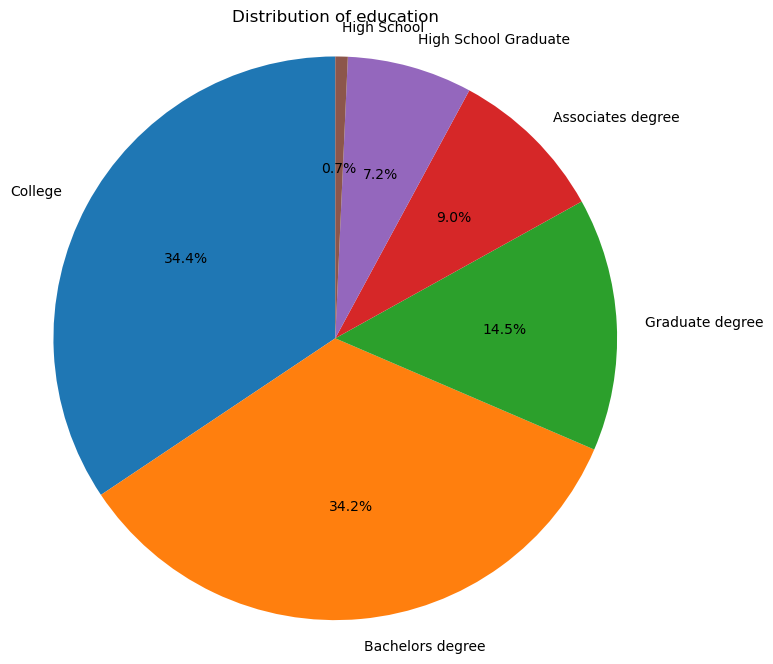

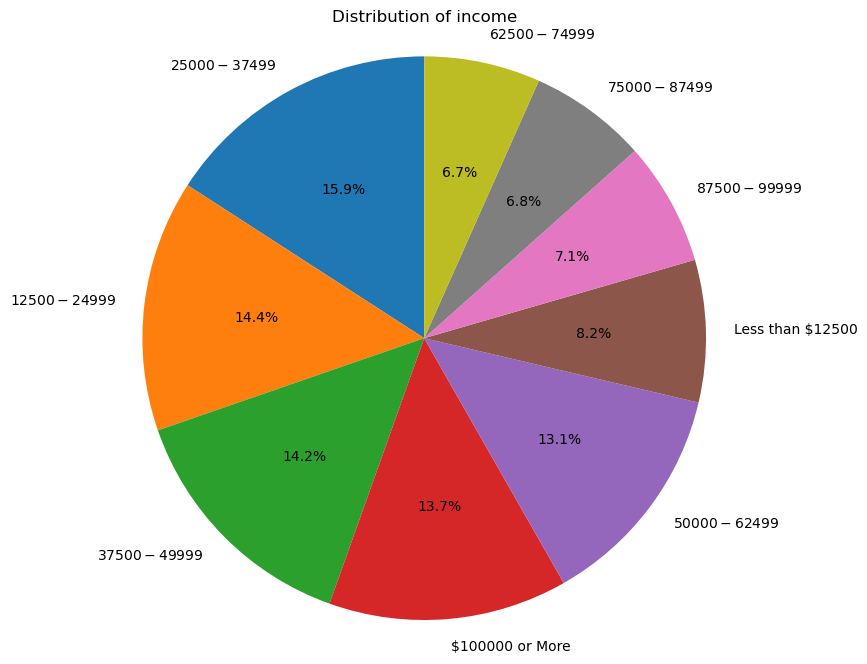

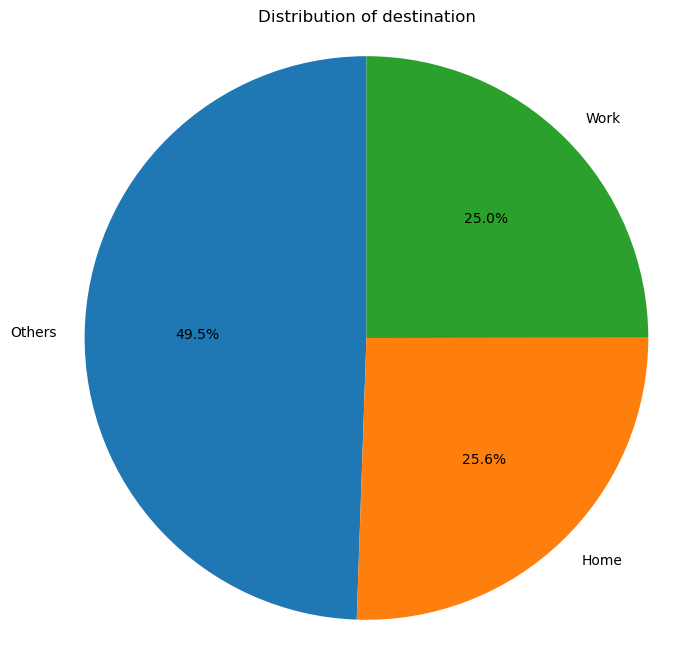

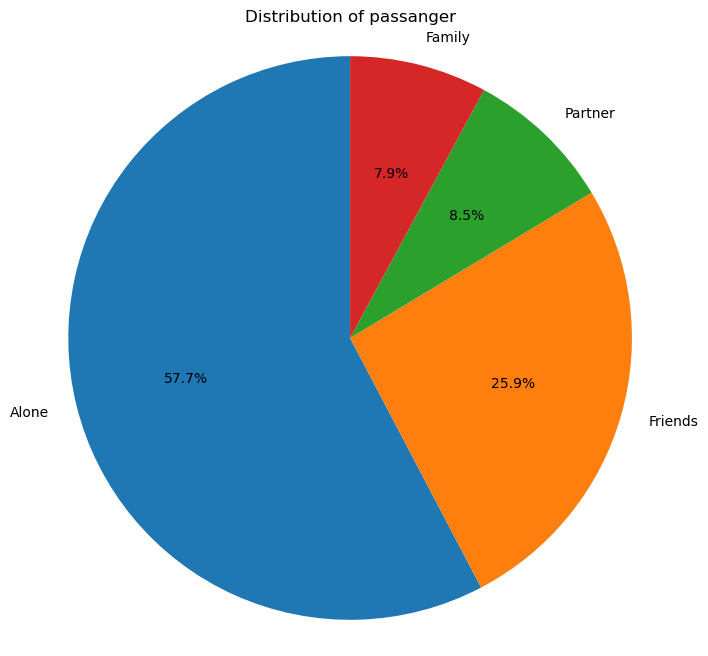

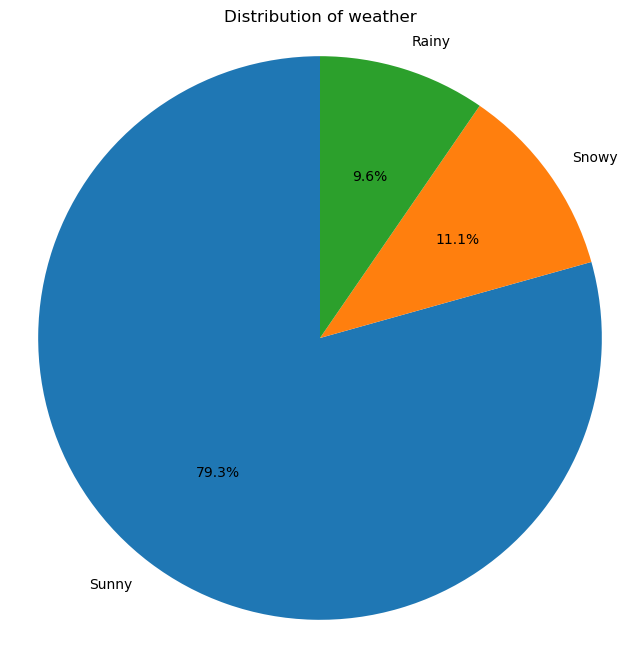

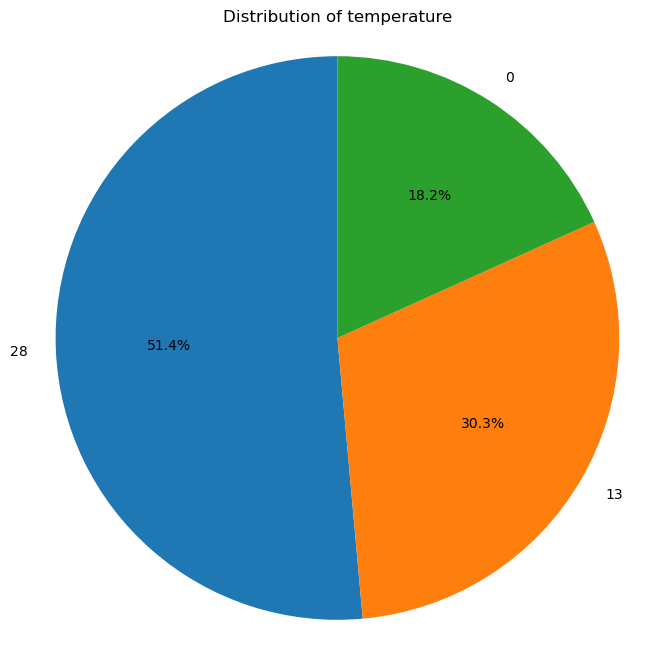

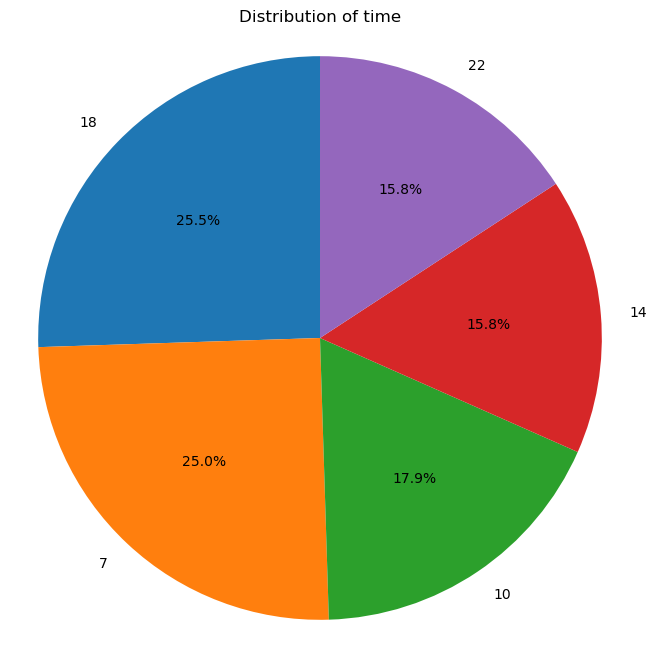

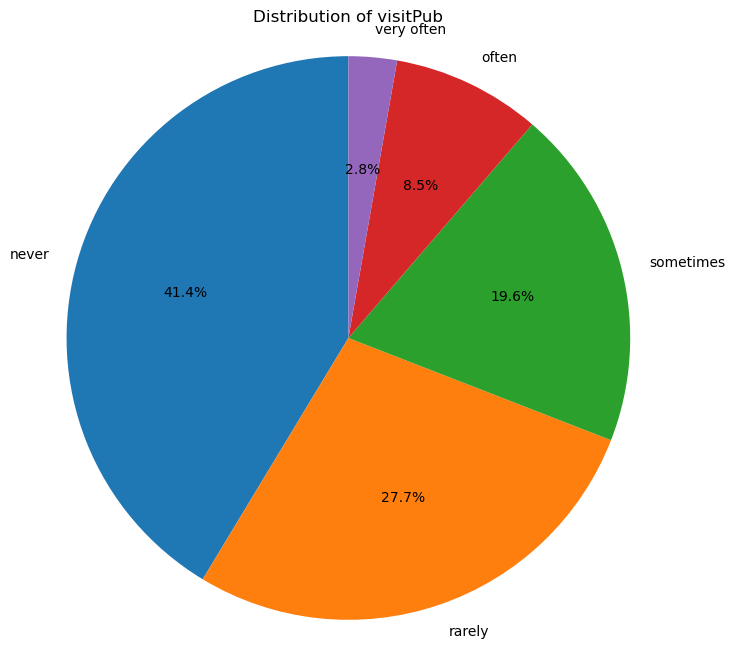

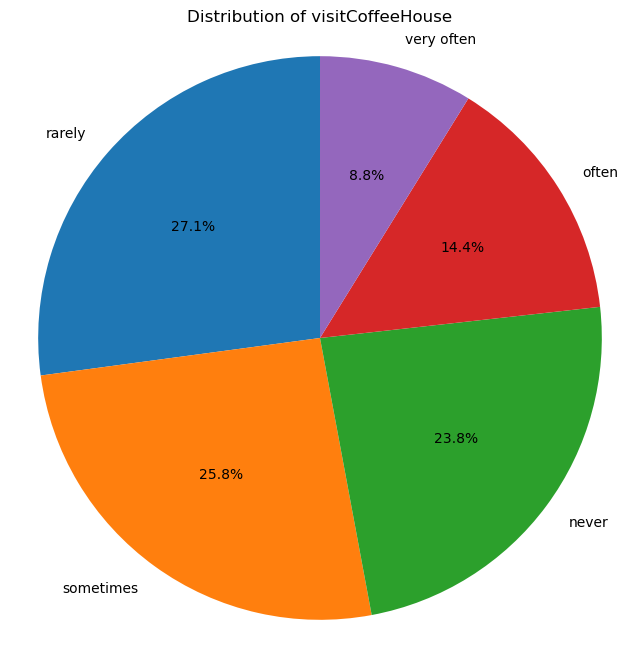

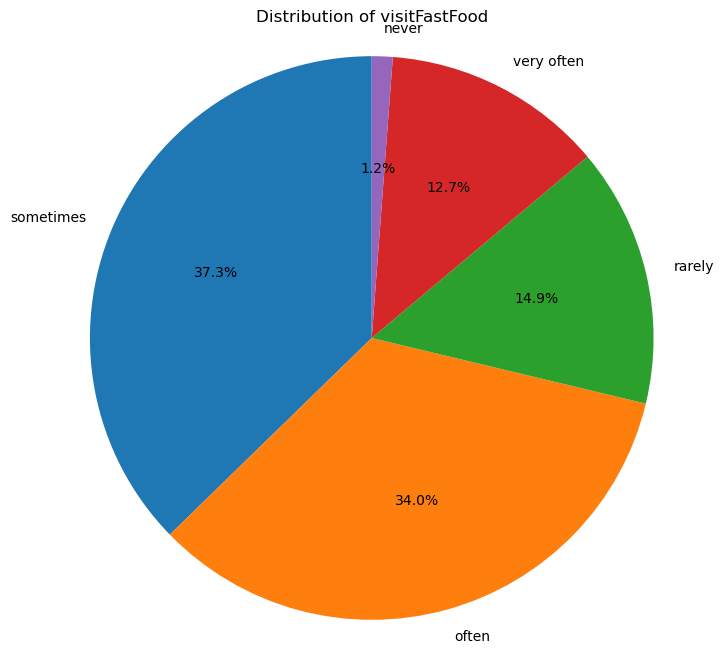

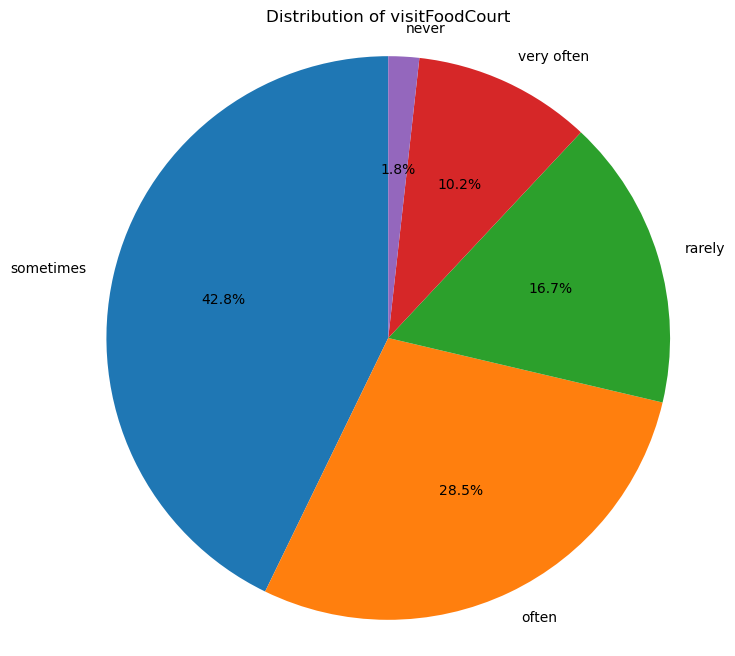

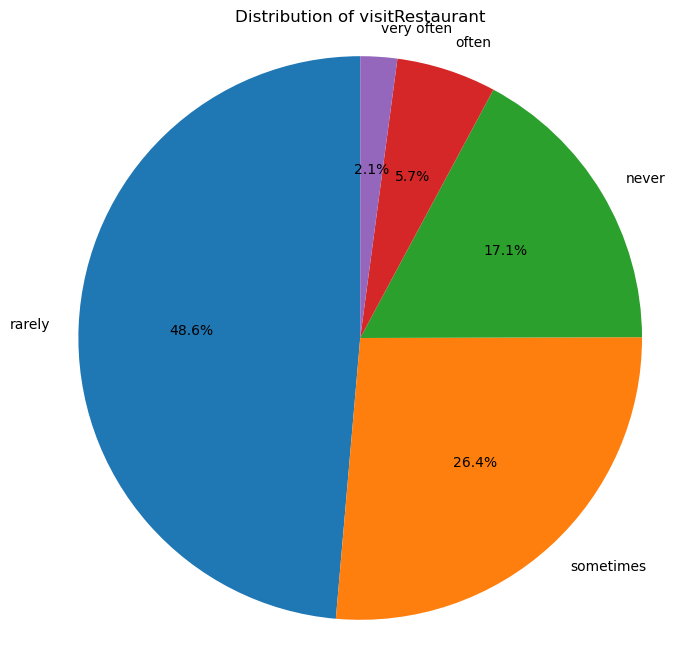

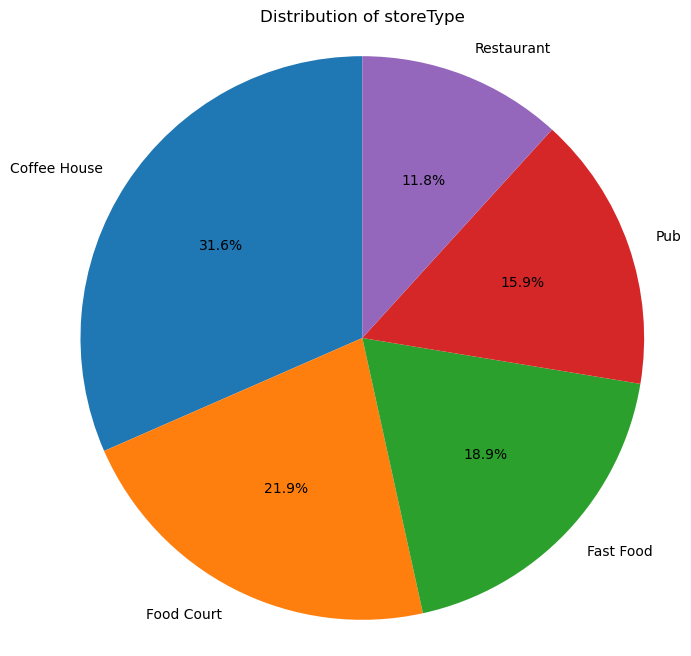

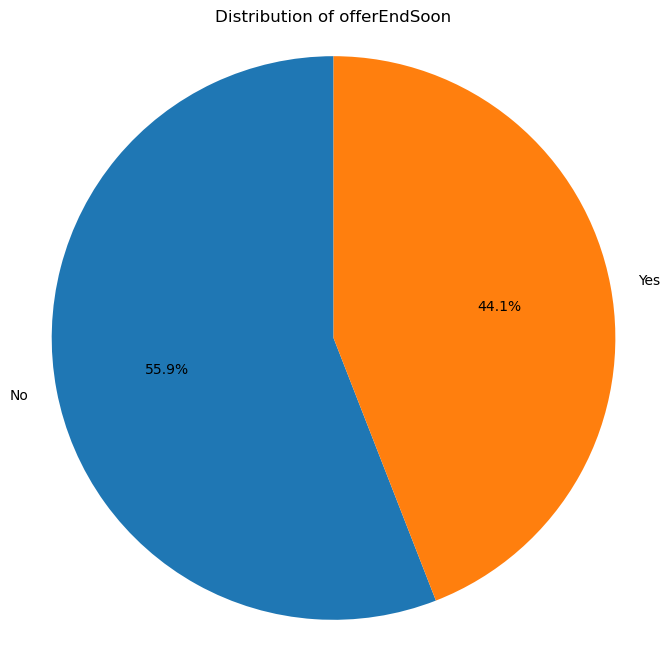

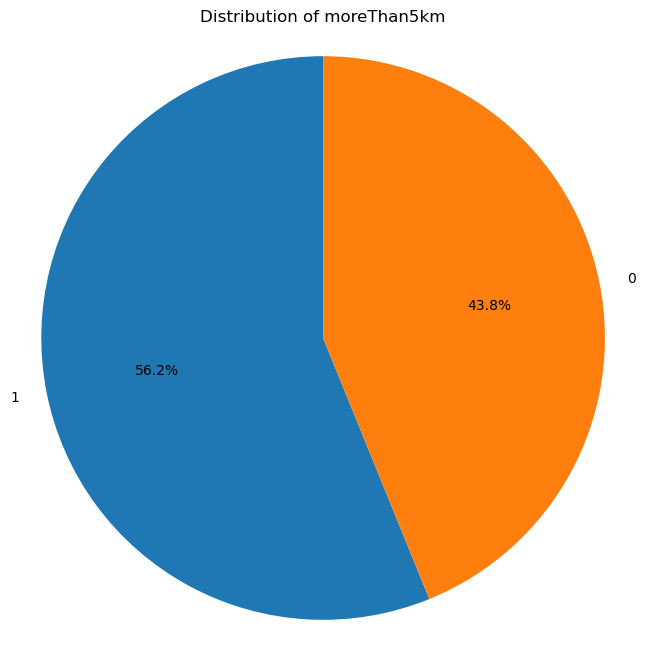

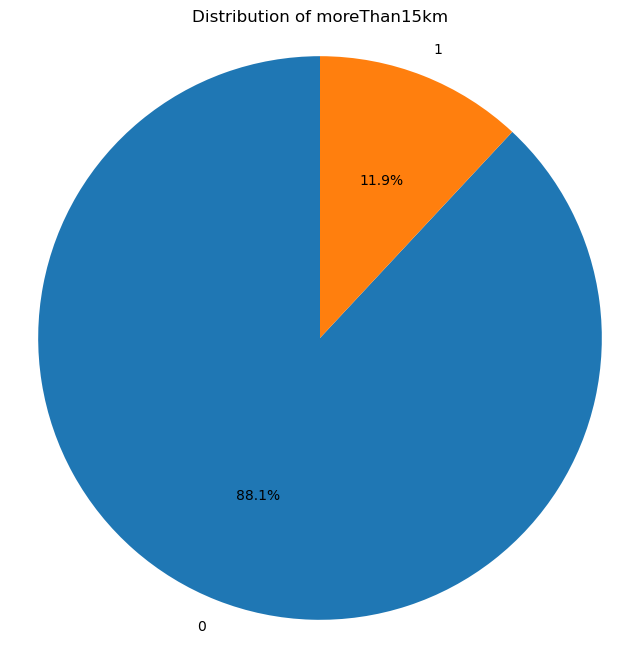

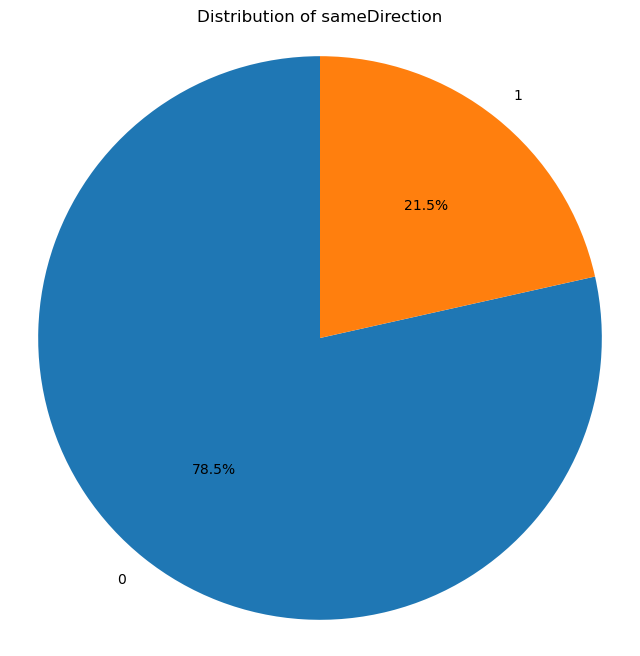

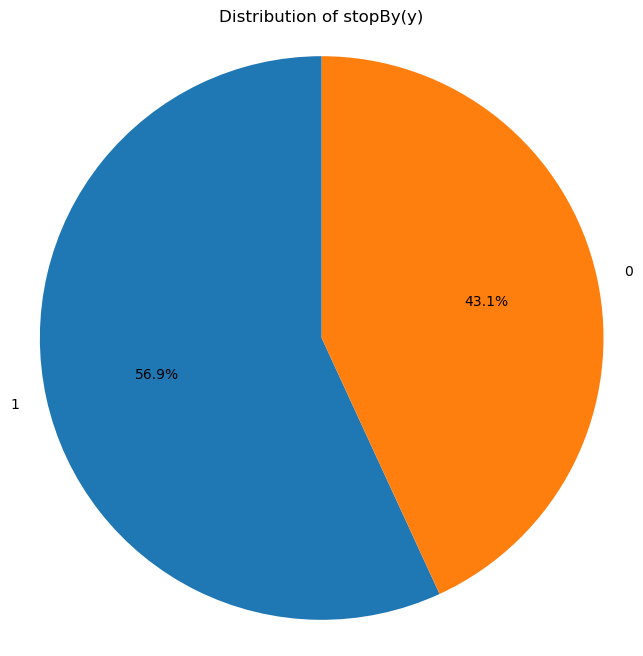

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def create_pie_charts(data):
    # Get the list of column names
    column_names = data.columns.tolist()

    # Loop through the columns and create pie charts
    for column_name in column_names:
        # Extract data from the column
        column_data = data[column_name]

        # Calculate counts of unique values in the column
        value_counts = column_data.value_counts()

        # Create the pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribution of {column_name}')

        plt.axis('equal')
        plt.show()

# Call the function to create pie charts for each column
create_pie_charts(data)


#### Chi squared test

In [4]:

from scipy.stats import chi2_contingency
column_names = data.columns.tolist()

 

for column_name in column_names:

    # Perform a chi-square test for independence
    crosstab = pd.crosstab(data[column_name], data['stopBy(y)'])
    chi2, p, _, _ = chi2_contingency(crosstab)

 

    # Print the chi-square statistic and p-value
    print(column_name,f': ')
    print(f'Chi-Square Statistic: {chi2}')
    print(f'p-value: {p}')
    print()


gender : 
Chi-Square Statistic: 24.623407516802267
p-value: 6.969994177075864e-07

age : 
Chi-Square Statistic: 59.64967028370964
p-value: 1.7732894159627922e-10

maritalStatus : 
Chi-Square Statistic: 44.564388322486835
p-value: 4.89767471751511e-09

children : 
Chi-Square Statistic: 23.967494165887857
p-value: 9.797596413259435e-07

education : 
Chi-Square Statistic: 40.29232299618244
p-value: 1.3037762958445438e-07

income : 
Chi-Square Statistic: 48.74029446131457
p-value: 7.129674693663613e-08

destination : 
Chi-Square Statistic: 211.63723889846767
p-value: 1.1054968019886925e-46

passanger : 
Chi-Square Statistic: 220.1004194396662
p-value: 1.9099041562451561e-47

weather : 
Chi-Square Statistic: 131.9680986663665
p-value: 2.205420874875015e-29

temperature : 
Chi-Square Statistic: 53.579667570954165
p-value: 2.3191189032291347e-12

time : 
Chi-Square Statistic: 167.01366968400353
p-value: 4.574401312853647e-35

visitPub : 
Chi-Square Statistic: 73.72343637773513
p-value: 3.7098

## 2.0 Data Preprocessing 

### 2.1 Split the dataset into training and testing set

#### 2.1.1 Seperate the output vector from the input matrix

In [5]:
X = data.drop('stopBy(y)',axis = 1)
y = data['stopBy(y)']

#### 2.1.2 Split the dataset into training and testing set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Full set shape=', X.shape)
print ('Train shape=', X_train.shape)
print ('Test shape=', X_test.shape)


Full set shape= (12372, 21)
Train shape= (9897, 21)
Test shape= (2475, 21)


#### 2.1.3 Training set preprocessing

In [53]:
X_train['Coffee House'] = (X_train['storeType'] == 'Coffee House').astype(int)
X_train['Food Court'] = (X_train['storeType'] == 'Food Court').astype(int)
X_train['Fast Food'] = (X_train['storeType'] == 'Fast Food').astype(int)
X_train['Pub'] = (X_train['storeType'] == 'Pub').astype(int)
X_train['Restaurant'] = (X_train['storeType'] == 'Restaurant').astype(int)
columns_to_droptest = ['Coffee House','Food Court','Fast Food','Pub','Restaurant']
X_try = X_train[columns_to_droptest]
X_train = X_train.drop(columns=columns_to_droptest,axis = 1)

X_train


,gender,age,maritalStatus,children,education,income,destination,passanger,weather,temperature,...,visitPub,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,storeType,offerEndSoon,moreThan5km,moreThan15km,sameDirection
4464,Female,26,Partner,1,College,$50000 - $62499,Work,Alone,Rainy,13,...,often,very often,sometimes,sometimes,sometimes,Fast Food,No,0,0,0
123,Male,46,Married,1,Graduate degree,$87500 - $99999,Others,Family,Sunny,28,...,rarely,sometimes,sometimes,rarely,sometimes,Fast Food,Yes,1,0,0
9720,Female,31,Single,0,Associates degree,$75000 - $87499,Work,Alone,Sunny,28,...,never,rarely,often,sometimes,sometimes,Food Court,No,0,0,0
1952,Female,31,Married,0,College,$100000 or More,Home,Alone,Snowy,0,...,rarely,rarely,very often,often,rarely,Coffee House,No,1,0,0
10595,Female,55,Divorced,1,College,$37500 - $49999,Work,Alone,Sunny,28,...,never,never,often,sometimes,rarely,Coffee House,No,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,Female,21,Partner,0,College,$25000 - $37499,Others,Partner,Snowy,0,...,never,never,sometimes,never,never,Food Court,No,0,0,0
5191,Male,26,Single,0,College,$100000 or More,Others,Friends,Sunny,28,...,sometimes,never,often,sometimes,rarely,Food Court,Yes,0,0,0
5390,Female,31,Single,0,Graduate degree,$50000 - $62499,Home,Alone,Sunny,13,...,sometimes,often,often,often,often,Restaurant,No,1,0,0
860,Male,21,Single,1,College,$62500 - $74999,Others,Alone,Sunny,0,...,never,never,often,sometimes,sometimes,Fast Food,No,1,0,0


#### 2.1.4 Remove the categorical sets

In [8]:
columns_to_drop = ['temperature','gender','maritalStatus','education','destination','passanger','weather','income','storeType','offerEndSoon','sameDirection']
X_drop = X_train.drop(columns=columns_to_drop,axis = 1)
X_drop

,age,children,time,visitPub,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,moreThan5km,moreThan15km
4464,26,1,7,often,very often,sometimes,sometimes,sometimes,0,0
123,46,1,10,rarely,sometimes,sometimes,rarely,sometimes,1,0
9720,31,0,7,never,rarely,often,sometimes,sometimes,0,0
1952,31,0,18,rarely,rarely,very often,often,rarely,1,0
10595,55,1,7,never,never,often,sometimes,rarely,0,0
...,...,...,...,...,...,...,...,...,...,...
11964,21,0,10,never,never,sometimes,never,never,0,0
5191,26,0,18,sometimes,never,often,sometimes,rarely,0,0
5390,31,0,18,sometimes,often,often,often,often,1,0
860,21,1,10,never,never,often,sometimes,sometimes,1,0


### 2.2 Handling the training set values

#### 2.2.1 Training set norminal data labeling

In [54]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

X_train_weather = X_train['weather']
print(data['weather'])
X_train_weather = lb.fit_transform(X_train_weather)
print('\n',lb.classes_)
X_train_weather

X_train_gender=X_train['gender']
print(data['gender'])
X_train_gender = lb.fit_transform(X_train_gender)
print('\n',lb.classes_)
X_train_gender

X_train_maritalStatus=X_train['maritalStatus']
print(data['maritalStatus'])
X_train_maritalStatus = lb.fit_transform(X_train_maritalStatus)
print('\n',lb.classes_)
X_train_maritalStatus

X_train_education=X_train['education']
print(data['education'])
X_train_education = lb.fit_transform(X_train_education)
print('\n',lb.classes_)
X_train_education

X_train_destination=X_train['destination']
print(data['destination'])
X_train_destination = lb.fit_transform(X_train_destination)
print('\n',lb.classes_)
X_train_destination

X_train_passanger=X_train['passanger']
print(data['passanger'])
X_train_passanger = lb.fit_transform(X_train_passanger)
print('\n',lb.classes_)
X_train_passanger

X_train_storeType=X_train['storeType']
print(data['storeType'])
X_train_storeType = lb.fit_transform(X_train_storeType)
print('\n',lb.classes_)
X_train_storeType

X_train_offerEndSoon=X_train['offerEndSoon']
print(data['offerEndSoon'])
X_train_offerEndSoon = lb.fit_transform(X_train_offerEndSoon)
print('\n',lb.classes_)
X_train_offerEndSoon


0        Sunny
1        Sunny
2        Sunny
3        Sunny
4        Sunny
         ...  
12367    Sunny
12368    Rainy
12369    Sunny
12370    Sunny
12371    Sunny
Name: weather, Length: 12372, dtype: object

 ['Rainy' 'Snowy' 'Sunny']
0        Female
1        Female
2        Female
3          Male
4        Female
          ...  
12367    Female
12368    Female
12369    Female
12370      Male
12371    Female
Name: gender, Length: 12372, dtype: object

 ['Female' 'Male']
0        Partner
1        Married
2        Married
3         Single
4        Married
          ...   
12367    Married
12368    Married
12369    Partner
12370    Married
12371     Single
Name: maritalStatus, Length: 12372, dtype: object

 ['Divorced' 'Married' 'Partner' 'Single' 'Widowed']
0                  College
1          Graduate degree
2                  College
3                  College
4                  College
               ...        
12367              College
12368     Bachelors degree
12369    Associat

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

#### 2.2.2 Handle missing values for categorical data

In [11]:
print('Number of missing values for all categorical columns:',X_drop.isnull().sum())
columns_to_drop1 = ['visitPub','visitCoffeeHouse','visitFastFood','visitFoodCourt','visitRestaurant']
X_drop.info()
X_drop_1 = X_drop[['visitPub','visitCoffeeHouse','visitFastFood','visitFoodCourt','visitRestaurant']]
X_drop = X_drop.drop(columns=columns_to_drop1,axis = 1)
print(X_drop_1)
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(strategy = 'most_frequent')
imputer_cat.fit(X_drop_1)
X_drop1_tr = imputer_cat.transform(X_drop_1)
X_drop1_tr_pd = pd.DataFrame(X_drop1_tr)
print('\nNumber of missing values after filled in missing value:',X_drop1_tr_pd.isnull().sum())
X_drop1_tr_pd

r,c = X_drop1_tr_pd.shape
print(r)
print(c)

Number of missing values for all categorical columns: age                   0
children              0
time                  0
visitPub             78
visitCoffeeHouse    166
visitFastFood       121
visitFoodCourt       96
visitRestaurant     148
moreThan5km           0
moreThan15km          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9897 entries, 4464 to 7270
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               9897 non-null   int64 
 1   children          9897 non-null   int64 
 2   time              9897 non-null   int64 
 3   visitPub          9819 non-null   object
 4   visitCoffeeHouse  9731 non-null   object
 5   visitFastFood     9776 non-null   object
 6   visitFoodCourt    9801 non-null   object
 7   visitRestaurant   9749 non-null   object
 8   moreThan5km       9897 non-null   int64 
 9   moreThan15km      9897 non-null   int64 
dtypes: int64(5), object(5)
mem

#### 2.2.3 Encode ordinal categorical data into numerical

In [10]:
from sklearn.preprocessing import OrdinalEncoder

# Create a sample DataFrame with ordinal data
X_train_income = {'series': X_train['income']}
print(X_train_income)
X_train_income_pd = pd.DataFrame(X_train_income)

# Define the order of the ordinal categories
ordinal_categories = [
    'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
    '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999',
    '$100000 or More'
]

# Create and fit the OrdinalEncoder
oe = OrdinalEncoder(categories=[ordinal_categories])
X_train_income_encoded = oe.fit_transform(X_train_income_pd)

# X_train_income_encoded is now the label-encoded version of the 'income' column
X_train_income_encoded





{'series': 4464     $50000 - $62499
123      $87500 - $99999
9720     $75000 - $87499
1952     $100000 or More
10595    $37500 - $49999
              ...       
11964    $25000 - $37499
5191     $100000 or More
5390     $50000 - $62499
860      $62500 - $74999
7270     $62500 - $74999
Name: income, Length: 9897, dtype: object}


array([[4.],
       [7.],
       [6.],
       ...,
       [4.],
       [5.],
       [5.]])

In [12]:
from sklearn.preprocessing import OrdinalEncoder
X_train_n_l = np.empty((r, c))
# Create a sample DataFrame with ordinal data
for i in range(5):
    X_train_set = {'series': X_drop1_tr_pd[i]}
    print(X_train_set)
    X_train_set_pd = pd.DataFrame(X_train_set)


    # Define the order of the ordinal categories
    ordinal_categories1 = [
        'never', 'rarely','sometimes','often','very often'
    ]

    # Create and fit the OrdinalEncoder
    oe = OrdinalEncoder(categories=[ordinal_categories1])
    X_drop1_hs = oe.fit_transform(X_train_set_pd)


    X_drop1_hs
    X_drop1_hs_pd = pd.DataFrame(X_drop1_hs)
    X_train_n_l_pd = pd.DataFrame(X_train_n_l)
    X_train_n_l_pd.iloc[:,i] = X_drop1_hs_pd.squeeze()
   





{'series': 0           often
1          rarely
2           never
3          rarely
4           never
          ...    
9892        never
9893    sometimes
9894    sometimes
9895        never
9896        never
Name: 0, Length: 9897, dtype: object}
{'series': 0       very often
1        sometimes
2           rarely
3           rarely
4            never
           ...    
9892         never
9893         never
9894         often
9895         never
9896     sometimes
Name: 1, Length: 9897, dtype: object}
{'series': 0        sometimes
1        sometimes
2            often
3       very often
4            often
           ...    
9892     sometimes
9893         often
9894         often
9895         often
9896         often
Name: 2, Length: 9897, dtype: object}
{'series': 0       sometimes
1          rarely
2       sometimes
3           often
4       sometimes
          ...    
9892        never
9893    sometimes
9894        often
9895    sometimes
9896    sometimes
Name: 3, Length: 9897, dtype

In [13]:
 X_train_n_l
 

array([[3., 4., 2., 2., 2.],
       [1., 2., 2., 1., 2.],
       [0., 1., 3., 2., 2.],
       ...,
       [2., 3., 3., 3., 3.],
       [0., 0., 3., 2., 2.],
       [0., 2., 3., 2., 2.]])

In [14]:

X_try = np.multiply(X_try, X_train_n_l)
X_try

,Coffee House,Food Court,Fast Food,Pub,Restaurant
4464,0.0,0.0,2.0,0.0,0.0
123,0.0,0.0,2.0,0.0,0.0
9720,0.0,1.0,0.0,0.0,0.0
1952,1.0,0.0,0.0,0.0,0.0
10595,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
11964,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,3.0
860,0.0,0.0,3.0,0.0,0.0


### 2.3 Finalizing the training set

In [15]:
X_train_full_data = np.hstack([X_drop,X_train_storeType,X_train_weather,X_train_n_l,X_train_income_encoded,X_train_gender,X_train_maritalStatus,X_train_education,X_train_destination,X_train_passanger,X_train_offerEndSoon,X_try])

In [16]:
X_train_full_data.shape

(9897, 44)

### 2.4 Testing set preprocessing


In [17]:
X_test.shape
X_test['Coffee House'] = (X_test['storeType'] == 'Coffee House').astype(int)
X_test['Food Court'] = (X_test['storeType'] == 'Food Court').astype(int)
X_test['Fast Food'] = (X_test['storeType'] == 'Fast Food').astype(int)
X_test['Pub'] = (X_test['storeType'] == 'Pub').astype(int)
X_test['Restaurant'] = (X_test['storeType'] == 'Restaurant').astype(int)
X_try_test = X_test[columns_to_droptest]
X_test = X_test.drop(columns=columns_to_droptest,axis = 1)

X_try_test
X_test


,gender,age,maritalStatus,children,education,income,destination,passanger,weather,temperature,...,visitPub,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,storeType,offerEndSoon,moreThan5km,moreThan15km,sameDirection
3693,Male,31,Single,0,College,$12500 - $24999,Others,Friends,Snowy,0,...,sometimes,rarely,often,rarely,never,Fast Food,No,1,0,0
4900,Male,41,Married,1,Graduate degree,$50000 - $62499,Others,Alone,Sunny,13,...,never,sometimes,sometimes,sometimes,rarely,Food Court,No,0,0,0
8019,Female,55,Married,1,Bachelors degree,$50000 - $62499,Others,Friends,Sunny,28,...,often,often,sometimes,sometimes,rarely,Restaurant,Yes,1,0,0
3154,Male,26,Married,1,Bachelors degree,$25000 - $37499,Home,Family,Sunny,28,...,rarely,never,sometimes,rarely,rarely,Restaurant,Yes,1,0,1
4414,Male,55,Married,1,College,$50000 - $62499,Others,Partner,Sunny,28,...,never,very often,never,often,rarely,Pub,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7711,Female,55,Married,1,College,$87500 - $99999,Home,Alone,Snowy,0,...,never,very often,rarely,sometimes,rarely,Coffee House,No,1,0,0
10915,Female,31,Single,0,Bachelors degree,$25000 - $37499,Others,Friends,Sunny,28,...,rarely,sometimes,often,very often,rarely,Food Court,No,1,0,0
9974,Female,55,Single,0,Bachelors degree,$37500 - $49999,Work,Alone,Sunny,28,...,never,never,rarely,often,rarely,Coffee House,Yes,1,0,1
4295,Male,31,Married,1,College,$37500 - $49999,Others,Alone,Sunny,13,...,never,rarely,often,rarely,rarely,Food Court,No,0,0,0


In [18]:
X_test_drop = X_test.drop(columns=columns_to_drop,axis = 1)
X_test_drop

,age,children,time,visitPub,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,moreThan5km,moreThan15km
3693,31,0,10,sometimes,rarely,often,rarely,never,1,0
4900,41,1,14,never,sometimes,sometimes,sometimes,rarely,0,0
8019,55,1,14,often,often,sometimes,sometimes,rarely,1,0
3154,26,1,18,rarely,never,sometimes,rarely,rarely,1,0
4414,55,1,18,never,very often,never,often,rarely,1,0
...,...,...,...,...,...,...,...,...,...,...
7711,55,1,18,never,very often,rarely,sometimes,rarely,1,0
10915,31,0,14,rarely,sometimes,often,very often,rarely,1,0
9974,55,0,7,never,never,rarely,often,rarely,1,0
4295,31,1,14,never,rarely,often,rarely,rarely,0,0


### 2.5 Handling the testing set values

#### 2.5.1 Testing set nominal data labeling

In [19]:
from sklearn.preprocessing import LabelBinarizer
X_test_weather = X_test['weather']
lb = LabelBinarizer()
lb.fit(X_test_weather)
X_test_weather = lb.transform(X_test_weather)


lb = LabelBinarizer()
X_test_gender=X_test['gender']
X_test_gender = lb.fit_transform(X_test_gender)
print('\n',lb.classes_)


X_test_maritalStatus=X_test['maritalStatus']
print(data['maritalStatus'])
X_test_maritalStatus = lb.fit_transform(X_test_maritalStatus)
print('\n',lb.classes_)


X_test_education=X_test['education']
X_test_education = lb.fit_transform(X_test_education)
print('\n',lb.classes_)

X_test_destination=X_test['destination']
X_test_destination = lb.fit_transform(X_test_destination)
print('\n',lb.classes_)


X_test_passanger=X_test['passanger']
X_test_passanger = lb.fit_transform(X_test_passanger)
print('\n',lb.classes_)
X_test_passanger

X_test_storeType=X_test['storeType']
X_test_storeType = lb.fit_transform(X_test_storeType)
print('\n',lb.classes_)


X_test_offerEndSoon=X_test['offerEndSoon']
X_test_offerEndSoon = lb.fit_transform(X_test_offerEndSoon)
print('\n',lb.classes_)




 ['Female' 'Male']
0        Partner
1        Married
2        Married
3         Single
4        Married
          ...   
12367    Married
12368    Married
12369    Partner
12370    Married
12371     Single
Name: maritalStatus, Length: 12372, dtype: object

 ['Divorced' 'Married' 'Partner' 'Single' 'Widowed']

 ['Associates degree' 'Bachelors degree' 'College' 'Graduate degree'
 'High School' 'High School Graduate']

 ['Home' 'Others' 'Work']

 ['Alone' 'Family' 'Friends' 'Partner']

 ['Coffee House' 'Fast Food' 'Food Court' 'Pub' 'Restaurant']

 ['No' 'Yes']


#### 2.5.2 Handle missing values for categorical data

In [21]:
print('Number of missing values for all categorical columns:',X_test_drop.isnull().sum())
columns_to_drop1 = ['visitPub','visitCoffeeHouse','visitFastFood','visitFoodCourt','visitRestaurant']
X_test_drop.info()
X_test_drop_1 = X_test_drop[['visitPub','visitCoffeeHouse','visitFastFood','visitFoodCourt','visitRestaurant']]
X_test_drop = X_test_drop.drop(columns=columns_to_drop1,axis = 1)

imputer_cat = SimpleImputer(strategy = 'most_frequent')
imputer_cat.fit(X_test_drop_1)
X_test_drop1_tr = imputer_cat.transform(X_test_drop_1)
X_test_drop1_tr_pd = pd.DataFrame(X_test_drop1_tr)
print('\nNumber of missing values after filled in missing value:',X_test_drop1_tr_pd.isnull().sum())


r,c = X_test_drop1_tr_pd.shape
print(r)
print(c)

Number of missing values for all categorical columns: age                  0
children             0
time                 0
visitPub            27
visitCoffeeHouse    48
visitFastFood       27
visitFoodCourt      32
visitRestaurant     38
moreThan5km          0
moreThan15km         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 3693 to 1691
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               2475 non-null   int64 
 1   children          2475 non-null   int64 
 2   time              2475 non-null   int64 
 3   visitPub          2448 non-null   object
 4   visitCoffeeHouse  2427 non-null   object
 5   visitFastFood     2448 non-null   object
 6   visitFoodCourt    2443 non-null   object
 7   visitRestaurant   2437 non-null   object
 8   moreThan5km       2475 non-null   int64 
 9   moreThan15km      2475 non-null   int64 
dtypes: int64(5), object(5)
memory usage:

#### 2.5.3 Encode ordinal categorical data into numerical

In [20]:
# Create a sample DataFrame with ordinal data
X_test_income = {'series': X_test['income']}
X_test_income_pd = pd.DataFrame(X_test_income)
oe = OrdinalEncoder(categories=[ordinal_categories])
X_test_income_encoded = oe.fit_transform(X_test_income_pd)
X_test_income_encoded


array([[1.],
       [4.],
       [4.],
       ...,
       [3.],
       [3.],
       [2.]])

In [22]:
X_test_n_l = np.empty((r, c))
# Create a sample DataFrame with ordinal data
for i in range(5):
    X_test_set = {'series': X_test_drop1_tr_pd[i]}
    print(X_test_set)
    X_test_set_pd = pd.DataFrame(X_test_set)

    # Create and fit the OrdinalEncoder
    oe = OrdinalEncoder(categories=[ordinal_categories1])
    X_test_drop1_hs = oe.fit_transform(X_test_set_pd)


   
    X_test_drop1_hs_pd = pd.DataFrame(X_test_drop1_hs)
    X_test_n_l_pd = pd.DataFrame(X_test_n_l)
    X_test_n_l_pd.iloc[:,i] = X_test_drop1_hs_pd.squeeze()
   




{'series': 0       sometimes
1           never
2           often
3          rarely
4           never
          ...    
2470        never
2471       rarely
2472        never
2473        never
2474       rarely
Name: 0, Length: 2475, dtype: object}
{'series': 0           rarely
1        sometimes
2            often
3            never
4       very often
           ...    
2470    very often
2471     sometimes
2472         never
2473        rarely
2474         never
Name: 1, Length: 2475, dtype: object}
{'series': 0           often
1       sometimes
2       sometimes
3       sometimes
4           never
          ...    
2470       rarely
2471        often
2472       rarely
2473        often
2474        often
Name: 2, Length: 2475, dtype: object}
{'series': 0           rarely
1        sometimes
2        sometimes
3           rarely
4            often
           ...    
2470     sometimes
2471    very often
2472         often
2473        rarely
2474    very often
Name: 3, Length: 2475, dtype

In [23]:
X_test_n_l
X_try_test = X_try_test * X_test_n_l
X_try_test

,Coffee House,Food Court,Fast Food,Pub,Restaurant
3693,0.0,0.0,3.0,0.0,0.0
4900,0.0,2.0,0.0,0.0,0.0
8019,0.0,0.0,0.0,0.0,1.0
3154,0.0,0.0,0.0,0.0,1.0
4414,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...
7711,0.0,0.0,0.0,0.0,0.0
10915,0.0,2.0,0.0,0.0,0.0
9974,0.0,0.0,0.0,0.0,0.0
4295,0.0,1.0,0.0,0.0,0.0


### 2.6 Finalizing the testing set

In [24]:
X_test_full_data = np.hstack([X_test_drop,X_test_storeType,X_test_weather, X_test_n_l,X_test_income_encoded,X_test_gender,X_test_maritalStatus,X_test_education,X_test_destination,X_test_passanger,X_test_offerEndSoon,X_try_test])

In [25]:
X_test_full_data.shape


(2475, 44)

## 3.0 Train Model

##### List of functions 

In [26]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_CM(confusion_matrix):
    g_names = ['True Neg','False Pos','False Neg','True Pos']
    g_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    g_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(g_names,g_counts,g_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.set({'figure.figsize':(7,5)})
    hm = sns.heatmap(cmatrix, annot=labels, fmt='', cmap='Purples')
    hm.set_title('Confusion Matrix with labels\n\n')
    hm.set_xlabel("\nPredicted Values")
    hm.set_ylabel("Actual Values")
    hm.xaxis.set_ticklabels(['False', 'True'])
    hm.yaxis.set_ticklabels(['False', 'True'])

 

    plt.show()
    

In [27]:
#plot PR curve
from sklearn.metrics import precision_recall_curve
def pre_vs_rec(precisions, recalls):
    plt.title ('Precision-Recall Graph', fontsize = 20)
    plt.plot(recalls, precisions, linewidth = 4)
    plt.plot(np.linspace(0,1,10), np.linspace(1,0,10), "k--")
    plt.xlabel("Recall", fontsize=20)
    plt.ylabel("Precision", fontsize=20)
    plt.axis([0, 1, 0, 1])

In [28]:
#plot ROC curve
from sklearn.metrics import roc_curve
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('ROC Curve', fontsize=20)

### 3.1 Model #1: Random Forest Classifier

#### 3.1.1 Training Model 

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


# 1. Create a RandomForestClassifier with default parameters
model = RandomForestClassifier(random_state=42)

# 2. Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100,150 , 200],  # Increase the number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 3, 4],  # Decrease the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]    # Minimum samples required at a leaf node
}

# 3. Create GridSearchCV Object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 4. Perform Grid Search
grid_search.fit(X_train_full_data, y_train)

# 5. Retrieve Best Model
best_model = grid_search.best_estimator_


#### 3.1.2 Performance Measure

In [32]:
y_pred_tree_train = best_model.predict(X_train_full_data)
accuracy = accuracy_score(y_train, y_pred_tree_train)
report = classification_report(y_train, y_pred_tree_train)

print("Best Hyperparameters:", grid_search.best_params_)
print(f"Accuracy on Train Data: {accuracy}")
print(f"Classification Report:\n{report}")


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Accuracy on Train Data: 0.992320905324846
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4262
           1       0.99      1.00      0.99      5635

    accuracy                           0.99      9897
   macro avg       0.99      0.99      0.99      9897
weighted avg       0.99      0.99      0.99      9897



In [33]:
y_pred_tree_test = best_model.predict(X_test_full_data)
accuracy = accuracy_score(y_test, y_pred_tree_test)
report = classification_report(y_test, y_pred_tree_test)

print("Best Hyperparameters:", grid_search.best_params_)
print(f"Accuracy on Test Data: {accuracy}")
print(f"Classification Report:\n{report}")


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Accuracy on Test Data: 0.7474747474747475
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.65      0.69      1074
           1       0.75      0.82      0.79      1401

    accuracy                           0.75      2475
   macro avg       0.75      0.74      0.74      2475
weighted avg       0.75      0.75      0.75      2475



In [34]:
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_test,y_pred_tree_test)

[[ 699  375]
 [ 250 1151]]


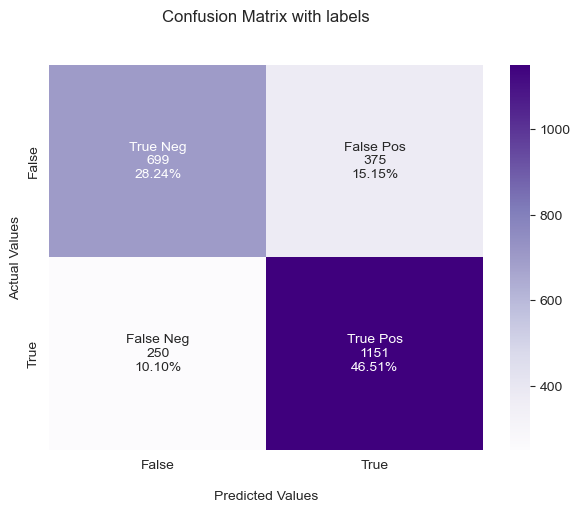

In [35]:
cmatrix = confusion_matrix(y_test, y_pred_tree_test)
print(cmatrix)

 

plot_CM(cmatrix)

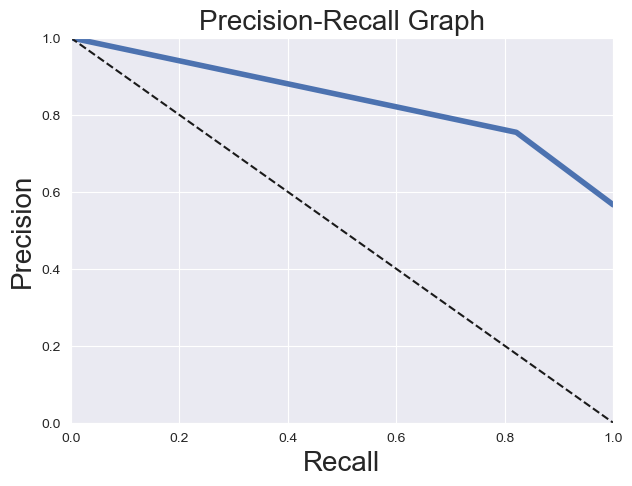

In [36]:
#PR curve
precisions, recalls, thresholds = precision_recall_curve(y_test,y_pred_tree_test)
pre_vs_rec(precisions, recalls)

### 3.2 Model #2: Support Vector Machine(SVM)

#### 3.2.1 Training Model 

In [39]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler



svm_classifier = svm.SVC(kernel='rbf', random_state=42)

# Define a grid of hyperparameter values to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_full_data, y_train)

# Get the best SVM classifier from the grid search
best_svm_classifier = grid_search.best_estimator_




#### 3.2.2 Performance Measure

In [40]:
y_pred_svm_train = best_svm_classifier.predict(X_train_full_data)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_pred_svm_train)
report = classification_report(y_train, y_pred_svm_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy on train data:", accuracy)
print("Classification Report:\n", report)


Best Hyperparameters: {'C': 10, 'gamma': 0.01}
Accuracy on train data: 0.8003435384459937
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      4262
           1       0.81      0.85      0.83      5635

    accuracy                           0.80      9897
   macro avg       0.80      0.79      0.79      9897
weighted avg       0.80      0.80      0.80      9897



In [41]:
# Make predictions on the test data
y_pred_svm_test = best_svm_classifier.predict(X_test_full_data)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred_svm_test)
report = classification_report(y_test, y_pred_svm_test)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy on test data:", accuracy)
print("Classification Report:\n", report)


Best Hyperparameters: {'C': 10, 'gamma': 0.01}
Accuracy on test data: 0.7369696969696969
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68      1074
           1       0.75      0.80      0.78      1401

    accuracy                           0.74      2475
   macro avg       0.73      0.73      0.73      2475
weighted avg       0.74      0.74      0.74      2475



In [42]:
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test,y_pred_svm_test)

[[ 698  376]
 [ 275 1126]]


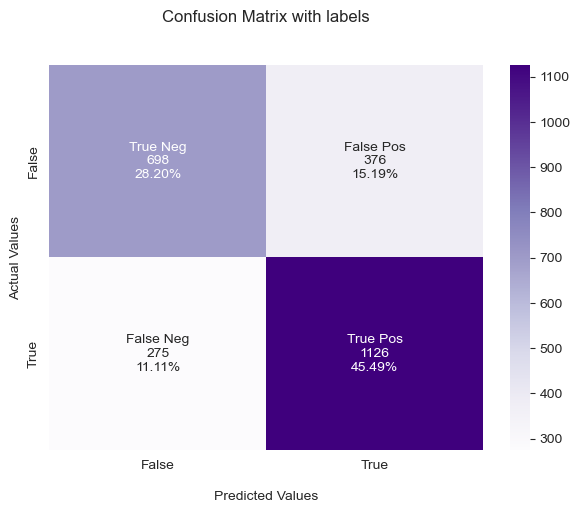

In [43]:
cmatrix = confusion_matrix(y_test, y_pred_svm_test)
print(cmatrix)

 

plot_CM(cmatrix)

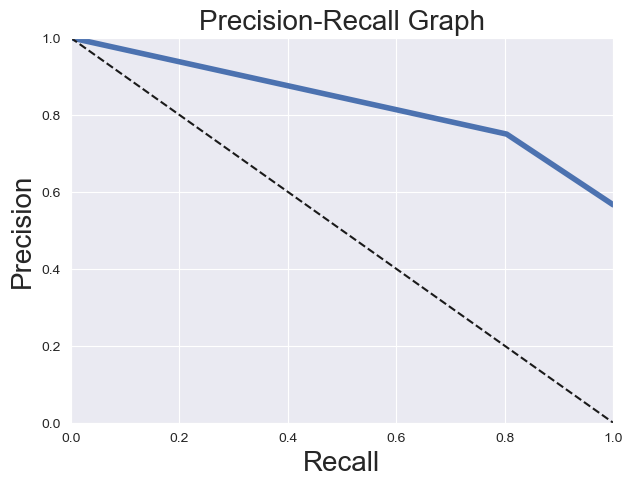

In [44]:
#PR curve
precisions, recalls, thresholds = precision_recall_curve(y_test,y_pred_svm_test)
pre_vs_rec(precisions, recalls)

### 3.3 Model #3: XGBoost Classifier

#### 3.3.1 Training Model 

In [45]:
!pip install xgboost 
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Define a grid of hyperparameter values to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_full_data, y_train)

# Get the best XGBoost classifier from the grid search
best_xgb_classifier = grid_search.best_estimator_


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB 1.3 MB/s eta 0:00:56
   ---------------------------------------- 0.1/70.9 MB 554.9 kB/s eta 0:02:08
   ---------------------------------------- 0.5/70.9 MB 1.3 MB/s eta 0:00:57
   ---------------------------------------- 0.7/70.9 MB 1.6 MB/s eta 0:00:44
    --------------------------------------- 0.9/70.9 MB 1.8 MB/s eta 0:00:39
    --------------------------------------- 1.2/70.9 MB 2.3 MB/s eta 0:00:31
    --------------------------------------- 1.5/70.9 MB 2.4 MB/s eta 0:00:29
   - -------------------------------------- 1.8/70.9 MB 2.8 MB/s eta 0:00:25
   - -------------------------------------- 2.0/70.9 MB 3.0 MB/s eta 0:00:23
   - -------------------------

#### 3.3.2 Performance Measure

In [46]:
y_pred_xgb_train = best_xgb_classifier.predict(X_train_full_data)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred_xgb_train)
report = classification_report(y_train, y_pred_xgb_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Accuracy: 0.8554107305244013
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.82      4262
           1       0.85      0.91      0.88      5635

    accuracy                           0.86      9897
   macro avg       0.86      0.85      0.85      9897
weighted avg       0.86      0.86      0.85      9897



In [47]:
# Make predictions on the test data
y_pred_xgb_test = best_xgb_classifier.predict(X_test_full_data)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb_test)
report = classification_report(y_test, y_pred_xgb_test)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Accuracy: 0.7515151515151515
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.65      0.69      1074
           1       0.75      0.83      0.79      1401

    accuracy                           0.75      2475
   macro avg       0.75      0.74      0.74      2475
weighted avg       0.75      0.75      0.75      2475



[[ 694  380]
 [ 235 1166]]


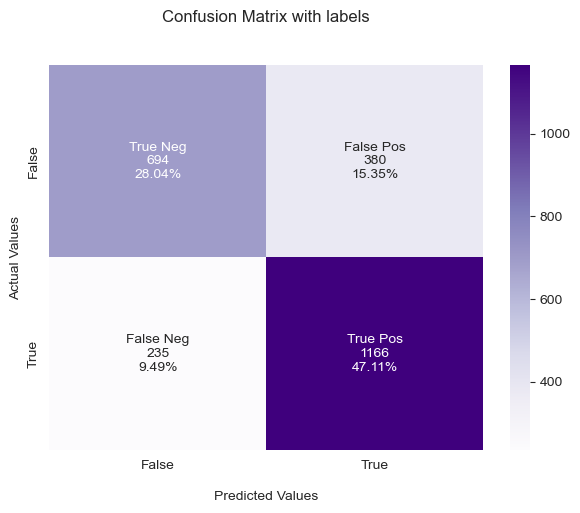

In [48]:
cmatrix = confusion_matrix(y_test, y_pred_xgb_test)
print(cmatrix)

 

plot_CM(cmatrix)

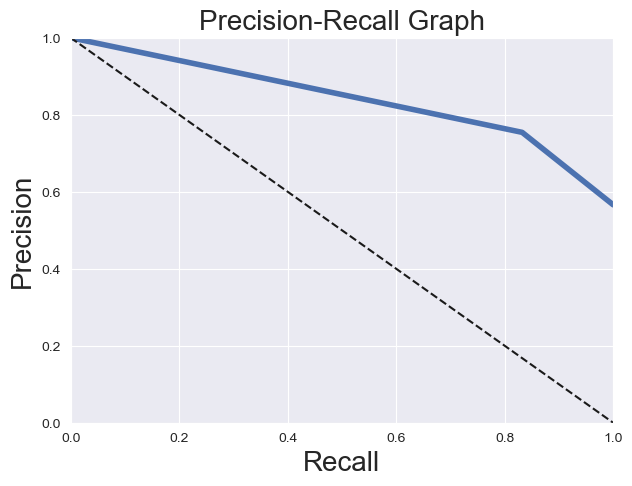

In [49]:
#PR curve
precisions, recalls, thresholds = precision_recall_curve(y_test,y_pred_xgb_test)
pre_vs_rec(precisions, recalls)

## 4.0 Model evalutation

In [50]:

xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test,y_pred_xgb_test)


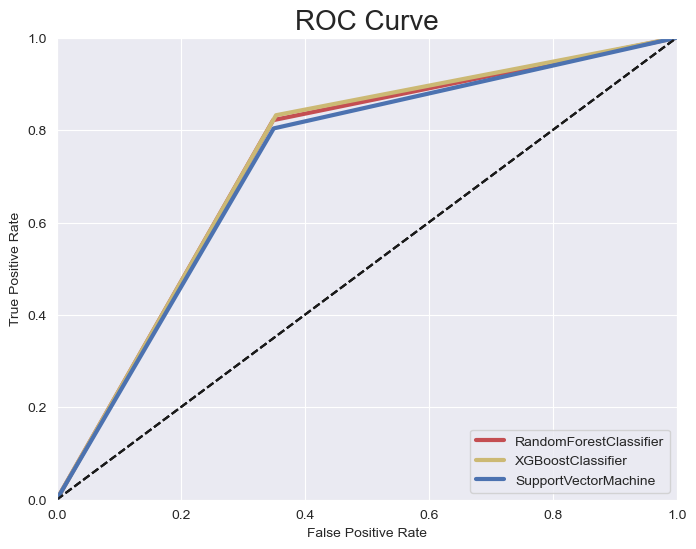

In [51]:
plt.figure(figsize = (8, 6))
plot_roc_curve(tree_fpr,tree_tpr, 'r-', 'RandomForestClassifier')
plot_roc_curve(xgb_fpr, xgb_tpr, 'y-', 'XGBoostClassifier')

plot_roc_curve(svm_fpr, svm_tpr, 'b-', 'SupportVectorMachine')



plt.legend (loc='lower right')

plt.show()

In [52]:
from sklearn.metrics import roc_auc_score
auc_tree = roc_auc_score(y_test, y_pred_tree_test)
auc_svm = roc_auc_score(y_test, y_pred_svm_test)
auc_xgb = roc_auc_score(y_test, y_pred_xgb_test)

print('AUC for RandomForestClassifier = {:.4f}'.format(auc_tree))
print('AUC for SupportVectorMachine = {:.4f}'.format(auc_svm))
print('AUC for XGBoostClassifier = {:.4f}'.format(auc_xgb))


AUC for RandomForestClassifier = 0.7362
AUC for SupportVectorMachine = 0.7268
AUC for XGBoostClassifier = 0.7392
